## Aufgabe 4

###  Aufgabe 4.1: Grenzwerte wurde durch Trial and Error herausgefunden, sonst über Sobelfilter
### Aufgabe 4.2

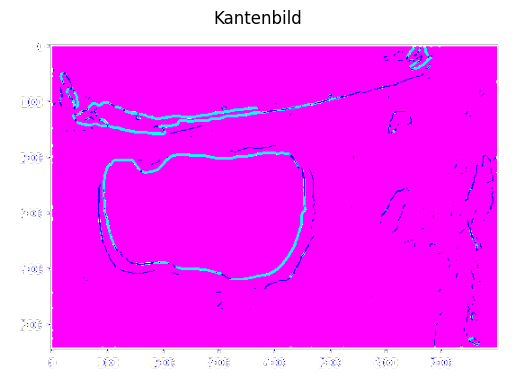

In [26]:
import numpy as np
import skimage.io
import skimage.filters
import matplotlib.pyplot as plt
import math


# Lade das Bild
image = skimage.io.imread('./bilder-Wk08/lake-duenn.png')

# Berechne die Gradientenstärke des Bildes
gradient_magnitude = skimage.filters.sobel(image)

# Definiere die Grenzwerte für die Gradientenstärke
UPPER = 0.115
LOWER = 0.04

# Erzeuge ein leeres Kantenbild
edge_image = np.zeros_like(image, dtype=np.uint8)

#  Markiere starke Kanten im Kantenbild
strong_edges = gradient_magnitude > UPPER
edge_image[strong_edges] = 255

# Markiere Nicht-Kanten im Kantenbild
non_edges = gradient_magnitude < LOWER
edge_image[non_edges] = 0

#Verbinde Pixel zwischen den Grenzwerten mit starken Kanten
def connect_edges(x, y):
    if x < 0 or y < 0 or x >= edge_image.shape[0] or y >= edge_image.shape[1]:
        return
    if np.all(edge_image[x, y] != 0):
        return
    edge_image[x, y] = 255
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            connect_edges(x + dx, y + dy)

for x in range(edge_image.shape[0]):
    for y in range(edge_image.shape[1]):
        if LOWER <= np.all(gradient_magnitude[x, y]) <= UPPER and np.all(edge_image[x, y] == 0):
            connect_edges(x, y)

#Zeige das finale Kantenbild
plt.imshow(edge_image, cmap='gray')
plt.axis('off')
plt.title('Kantenbild')
plt.show()
